In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [207]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df_frames = [train_df, test_df]
df=pd.concat(df_frames)

In [208]:
df.shape

(1309, 12)

In [209]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [211]:
df=df.drop('PassengerId',axis=1)

In [212]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass                                               Name  \
0         0.0       3                            Braund, Mr. Owen Harris   
1         1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1.0       3                             Heikkinen, Miss. Laina   
3         1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0.0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
413       NaN       3                                 Spector, Mr. Woolf   
414       NaN       1                       Oliva y Ocana, Dona. Fermina   
415       NaN       3                       Saether, Mr. Simon Sivertsen   
416       NaN       3                                Ware, Mr. Frederick   
417       NaN       3                           Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket  

In [213]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [214]:
#Missing_data
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


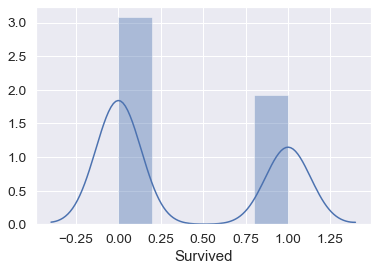

In [215]:
sns.distplot(df['Survived']);

In [216]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


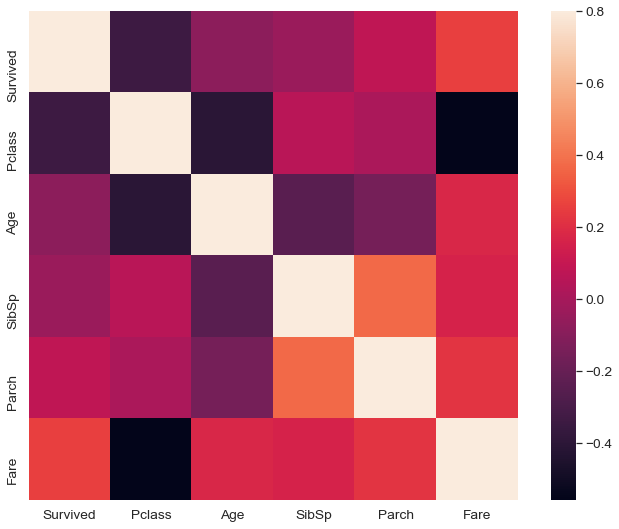

In [217]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

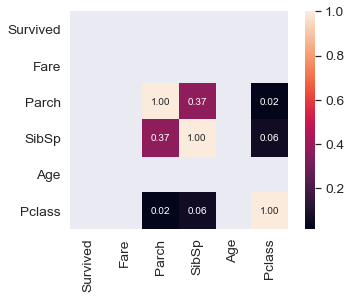

In [218]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


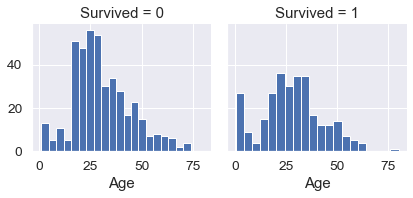

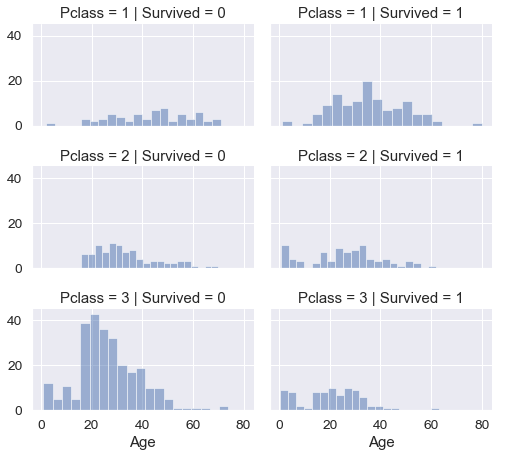

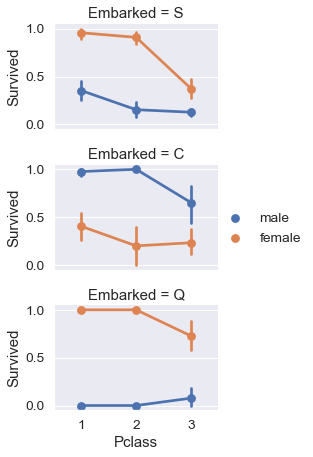

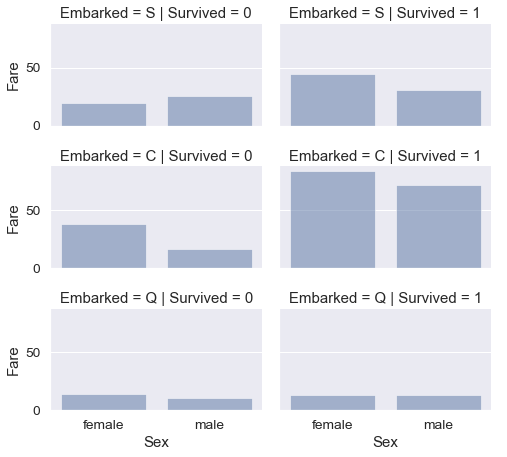

In [276]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()



In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [220]:
df[df["Survived"]==1].count()

Survived    342
Pclass      342
Name        342
Sex         342
Age         290
SibSp       342
Parch       342
Ticket      342
Fare        342
Cabin       136
Embarked    340
dtype: int64

In [221]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [222]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [223]:
df["Name"].head(8)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

In [224]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


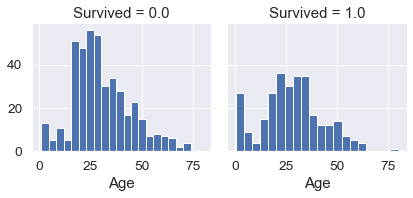

In [225]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

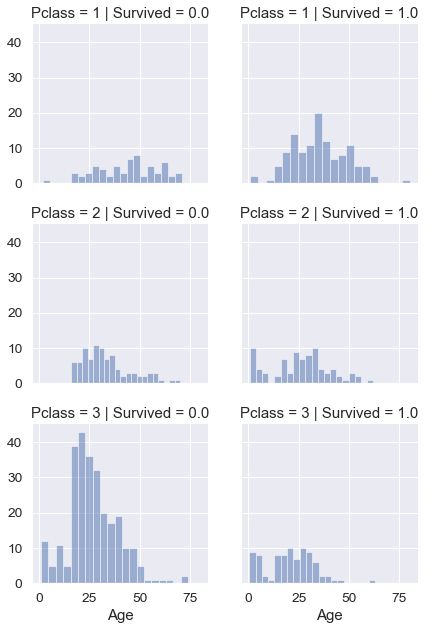

In [226]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [227]:
df["Name"].describe()

count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: Name, dtype: object

In [228]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


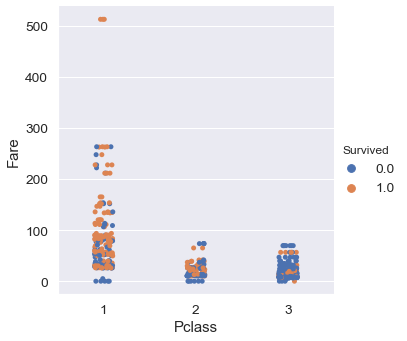

In [229]:
g=sns.catplot(y="Fare", x="Pclass",hue="Survived", data=df)

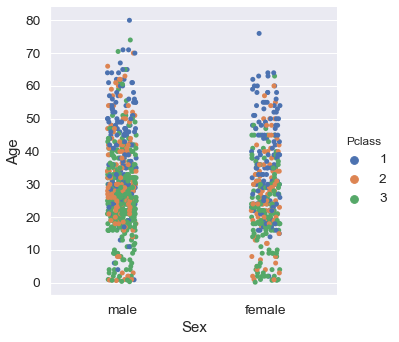

In [230]:
g=sns.catplot(y="Age", hue="Pclass",x="Sex", data=df)

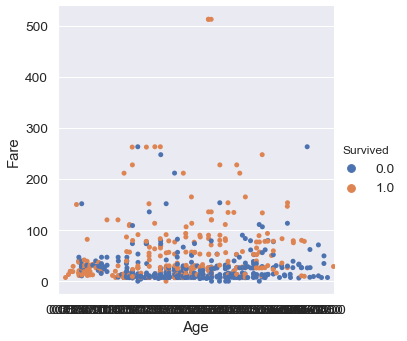

In [231]:
g=sns.catplot(y="Fare", x="Age",hue="Survived", data=df)

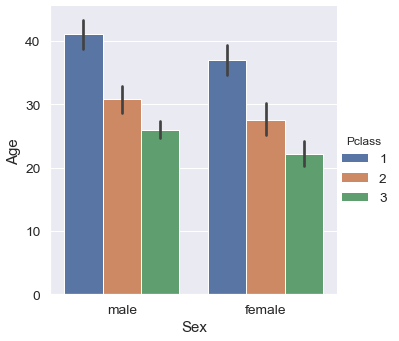

In [232]:
sns.catplot(x="Sex", y="Age", hue="Pclass", kind="bar", data=df)

In [233]:
df['Age_Range'] = pd.cut(df['Age'], 5)
df[['Age_Range', 'Survived']].groupby(['Age_Range'], as_index=False).mean().sort_values(by='Age_Range', ascending=True)

,Age_Range,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.369942
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [234]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.136, 32.102]"
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.102, 48.068]"
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.136, 32.102]"
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.102, 48.068]"
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.102, 48.068]"
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(48.068, 64.034]"
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.0902, 16.136]"
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(16.136, 32.102]"
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.0902, 16.136]"


In [235]:
type(df["Age_Range"][25])

pandas.core.series.Series

In [236]:
df.shape

(1309, 12)

In [237]:
df["Age"][7]

7     2.0
7    26.0
Name: Age, dtype: float64

In [238]:
len(df)

1309

In [239]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.136, 32.102]"
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.102, 48.068]"
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.136, 32.102]"
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.102, 48.068]"
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.102, 48.068]"
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(48.068, 64.034]"
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.0902, 16.136]"
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(16.136, 32.102]"
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.0902, 16.136]"


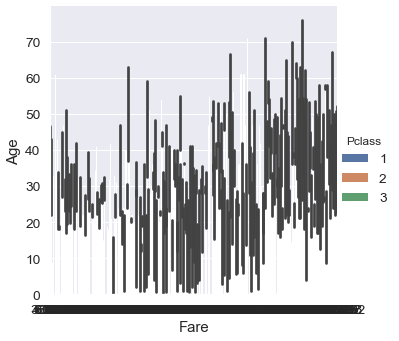

In [240]:
sns.catplot(x="Fare", y="Age", hue="Pclass", kind="bar", data=df)

In [241]:
df["Age"].isnull().sum()

263

In [242]:
df.drop("Ticket",axis=1,inplace=True)

In [243]:
df.drop("Cabin",axis=1,inplace=True)

In [244]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Range
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,"(16.136, 32.102]"
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,"(32.102, 48.068]"
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,"(16.136, 32.102]"
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,"(32.102, 48.068]"
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,"(32.102, 48.068]"


In [245]:
df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)

In [246]:
df['Embarked']=df['Embarked'].apply(lambda x: 0 if x =='S' else (1 if x =='C' else 2))

In [247]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Range
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,"(16.136, 32.102]"
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,"(32.102, 48.068]"
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,"(16.136, 32.102]"
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,"(32.102, 48.068]"
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,"(32.102, 48.068]"


In [248]:
df['Title']=df['Name'].apply(lambda x: x.split(" ")[1].split(".")[0])

In [249]:
df["Title"].count

<bound method Series.count of 0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414         y
415        Mr
416        Mr
417    Master
Name: Title, Length: 1309, dtype: object>

In [250]:
df['Title'] = df['Title'].replace(['Lady',"der", 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [251]:
df['Title'].value_counts()

Mr              736
Miss            256
Mrs             191
Master           59
Rare             26
y                 8
Planke,           4
Impe,             3
Billiard,         3
Carlo,            2
Ms                2
Gordon,           2
Messemaeker,      2
Mlle              2
the               1
Mulder,           1
Khalil,           1
Pelsmaeker,       1
Mme               1
Palmquist,        1
Shawah,           1
Cruyssen,         1
Velde,            1
Melkebeke,        1
Steen,            1
Brito,            1
Walle,            1
Name: Title, dtype: int64

In [252]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age']   = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age']   = 3
df.loc[ df['Age'] > 31, 'Age'] = 4

In [253]:
df['Sex']=df["Sex"].replace({'female' : 0 , "male": 1})

In [254]:
df.drop('Name',axis=1,inplace=True)

In [255]:
df['Family']=df["SibSp"]+df['Parch']

In [256]:
df.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_Range    263
Title          0
Family         0
dtype: int64

In [257]:
df['Age'].fillna(df['Age'].dropna().median(), inplace=True)

In [258]:
df.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_Range    263
Title          0
Family         0
dtype: int64

In [259]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

In [260]:
df["AgeClass"]=df['Age']*df["Pclass"]
df.drop('Age_Range',axis=1,inplace=True)

In [261]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,AgeClass
0,0.0,3,1,1.0,1,0,0,0,Mr,1,3.0
1,1.0,1,0,2.0,1,0,3,1,Mrs,1,2.0
2,1.0,3,0,1.0,0,0,1,0,Miss,0,3.0
3,1.0,1,0,2.0,1,0,3,0,Mrs,1,2.0
4,0.0,3,1,2.0,0,0,1,0,Mr,0,6.0


In [262]:
df1=pd.get_dummies(df)

In [263]:
df1.drop(['Title_Mulder,', 'Title_Palmquist,', 'Title_Pelsmaeker,',
       'Title_Planke,', 'Title_Shawah,', 'Title_Steen,',
       'Title_Velde,', 'Title_Walle,', 'Title_the', 'Title_y','Title_Billiard,', 'Title_Brito,', 'Title_Carlo,',
       'Title_Cruyssen,', 'Title_Gordon,', 'Title_Impe,', 'Title_Khalil,','Title_Melkebeke,', 'Title_Messemaeker,'],axis=1,inplace=True)

In [264]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family', 'AgeClass', 'Title_Master', 'Title_Miss',
       'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Title_Rare'],
      dtype='object')

In [265]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,AgeClass
0,0.0,3,1,1.0,1,0,0,0,Mr,1,3.0
1,1.0,1,0,2.0,1,0,3,1,Mrs,1,2.0
2,1.0,3,0,1.0,0,0,1,0,Miss,0,3.0
3,1.0,1,0,2.0,1,0,3,0,Mrs,1,2.0
4,0.0,3,1,2.0,0,0,1,0,Mr,0,6.0


In [266]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,AgeClass,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,0.0,3,1,1.0,1,0,0,0,1,3.0,0,0,0,0,1,0,0,0
1,1.0,1,0,2.0,1,0,3,1,1,2.0,0,0,0,0,0,1,0,0
2,1.0,3,0,1.0,0,0,1,0,0,3.0,0,1,0,0,0,0,0,0
3,1.0,1,0,2.0,1,0,3,0,1,2.0,0,0,0,0,0,1,0,0
4,0.0,3,1,2.0,0,0,1,0,0,6.0,0,0,0,0,1,0,0,0


In [267]:
df_train=df1[:891]

In [268]:
df_train.head(891)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,AgeClass,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,0.0,3,1,1.0,1,0,0,0,1,3.0,0,0,0,0,1,0,0,0
1,1.0,1,0,2.0,1,0,3,1,1,2.0,0,0,0,0,0,1,0,0
2,1.0,3,0,1.0,0,0,1,0,0,3.0,0,1,0,0,0,0,0,0
3,1.0,1,0,2.0,1,0,3,0,1,2.0,0,0,0,0,0,1,0,0
4,0.0,3,1,2.0,0,0,1,0,0,6.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,1,1.0,0,0,1,0,0,2.0,0,0,0,0,0,0,0,1
887,1.0,1,0,1.0,0,0,2,0,0,1.0,0,1,0,0,0,0,0,0
888,0.0,3,0,1.0,1,2,2,0,3,3.0,0,1,0,0,0,0,0,0
889,1.0,1,1,1.0,0,0,2,1,0,1.0,0,0,0,0,1,0,0,0


In [269]:
df_train.shape

(891, 18)

In [270]:
df_test=df1[891:]

In [271]:
df_test.drop('Survived',axis=1,inplace=True)

In [272]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,AgeClass,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,3,1,2.0,0,0,0,2,0,6.0,0,0,0,0,1,0,0,0
1,3,0,2.0,1,0,0,0,1,6.0,0,0,0,0,0,1,0,0
2,2,1,3.0,0,0,1,2,0,6.0,0,0,0,0,1,0,0,0
3,3,1,1.0,0,0,1,0,0,3.0,0,0,0,0,1,0,0,0
4,3,0,1.0,1,1,1,0,2,3.0,0,0,0,0,0,1,0,0


In [273]:
df_test.shape

(418, 17)

In [274]:
df_train.to_csv('trainF.csv')

In [275]:
df_test.to_csv('testF.csv')